# Topic 7 - Example 4 - Transform $sinc(t-2)$

In [16]:
from os.path import exists
file_exists = exists('basic_material.py')

if (not file_exists):
    !wget -O basic_material.py https://raw.githubusercontent.com/JonHowMIT/Signals_and_Systems/main/basic_material.py
%run basic_material

try: 
    from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
except:
    %pip install sympy
from sympy import lambdify, oo, Symbol, integrate, Heaviside, plot, Piecewise
from sympy import fourier_transform, exp, inverse_fourier_transform, sympify, DiracDelta, sinc, sin, cos, arg, atan2, re, cos, exp_polar, pi
from sympy.abc import A,B,t,f 
from sympy import re, im 

Running Python: 3.8.17
Running Sympy: 1.12rc1


In [17]:
ts = Symbol('t')
def my_rect(p):
    return Piecewise((0, t <= -p/2),(1, t <= p/2),(0, True))

p = Symbol('p')
sincu = lambda t,p: sinc(p*pi*t) # swithc to sinc ftn that evetyone else uses...

In [18]:
tlim = 4
tt = np.linspace(-tlim, tlim, 1000)
flim = 2
ff = np.linspace(-flim, flim, 1000)

In [37]:
A = Symbol('A')
B = Symbol('B')
sincuAB = lambda t,A,B: sinc(np.pi*(A*t+B)) # swithc to sinc ftn that evetyone else uses...

tau = -2
if tau <= 0:
    lstr = 'sinc(t'+str(tau)+')'
else:
    lstr = 'sinc(t+'+str(tau)+')'
    
nf1 = sincuAB(t,1,tau)
lam_nf1 = lambdify(t, nf1, modules=['numpy'])

nQ1 = fourier_transform(nf1, t, f)
lam_absnQ1 = lambdify(f, abs(nQ1), modules=['numpy'])
lam_argnQ1 = lambdify(f, arg(nQ1), modules=['numpy'])

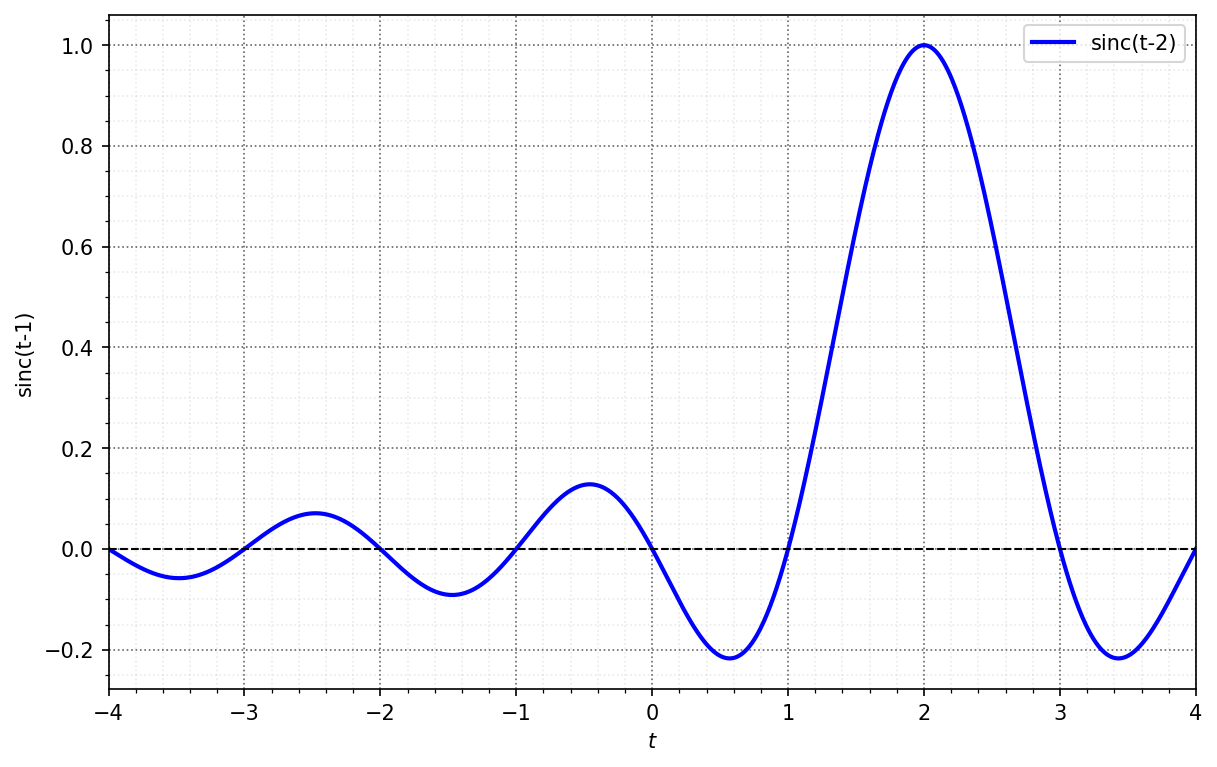

In [38]:
fig = plt.figure(figsize=(8, 5),dpi=150,constrained_layout = True)
plt.plot(tt, lam_nf1(tt),'b',label=lstr)
plt.legend()
plt.xlim(-tlim,tlim)
plt.xlabel('$t$')
plt.ylabel('sinc(t-1)')
nicegrid()
plt.show()

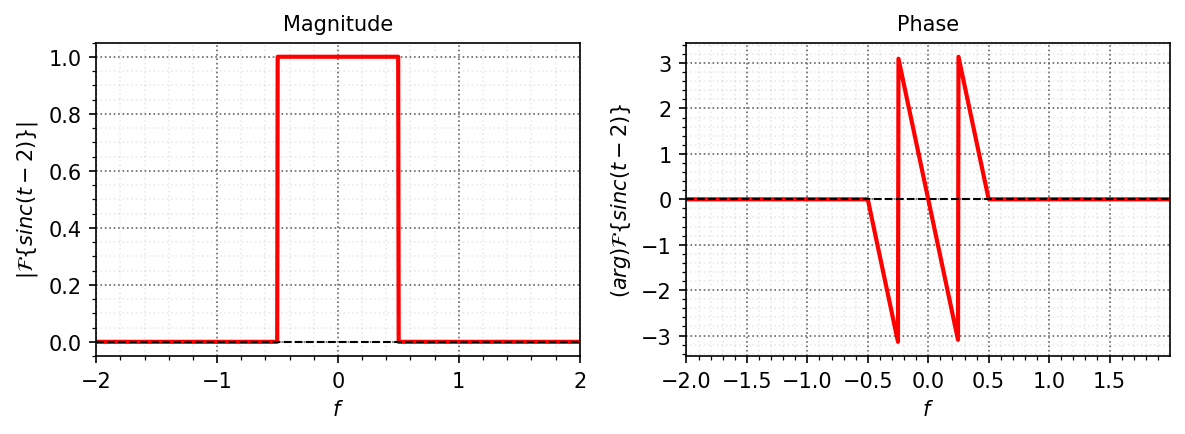

In [39]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(8,3), dpi=150)
ax1.plot(ff, lam_absnQ1(ff), 'r-', lw=2)
ax1.set_title('Magnitude')
ax1.set_ylabel('$|{\cal F}\{'+lstr+'\}|$')
ax1.set_xlabel('$f$')
nicegrid(ax1)

ax2.plot(ff, lam_argnQ1(ff), 'r-', lw=2)
ax2.set_title('Phase')
ax2.set_ylabel('$(arg) {\cal F}\{'+lstr+'\}$')
ax2.set_xlabel('$f$')
ax2.set_xticks(np.arange(-2,2,0.5))

nicegrid(ax2)
plt.show()

### Recall: Based on time shift property, expected transform ${\tt sinc} (t-\tau) = e^{-2\pi f j \tau}{\tt rect}(f)$